In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('./cardiovascular.csv', sep=',', na_values=['?'])
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
df.shape

(3390, 17)

In [4]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [5]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace=True)

df = df.fillna(df.mean())

In [6]:
df.isna().sum() # no more missing values

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex = df['sex']
is_smoking = df['is_smoking']

sex = le.fit_transform(sex)
is_smoking = le.fit_transform(is_smoking)

In [8]:
df['sex'] = sex
df['is_smoking'] = is_smoking

In [9]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [10]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [11]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('int32')], dtype=object)

In [12]:
X.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0


### ANOMALY DETECTION

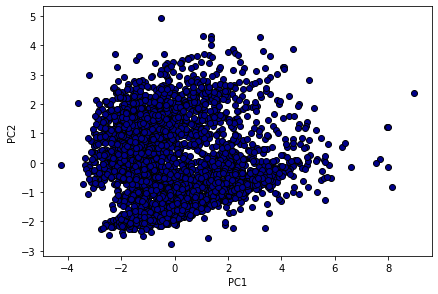

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

std = StandardScaler()
X_std = std.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(pd.DataFrame(X_pca).iloc[:, 0],
                pd.DataFrame(X_pca).iloc[:, 1],
                color='darkblue', edgecolors='black')
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

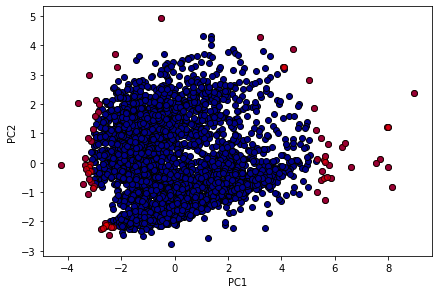

In [14]:
from sklearn.svm import OneClassSVM
from numpy import where

ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
ocsvm.fit(X_pca)

pred_ocsvm = ocsvm.predict(X_pca)
pred_ocsvm

anom_index = where(pred_ocsvm == -1)
outliers = X_pca[pred_ocsvm == -1]

plt.scatter(pd.DataFrame(X_pca).iloc[:,0], pd.DataFrame(X_pca).iloc[:,1], color = 'darkblue', edgecolors='black')
plt.scatter(pd.DataFrame(outliers).iloc[:, 0],
                pd.DataFrame(outliers).iloc[:, 1],
                color='red',
                alpha=.6, edgecolors='black')
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [15]:
lista = []
for i in anom_index[0]:
    lista.append(i)
outliers.shape[0] # numero di outliers

68

In [16]:
df = pd.DataFrame(df).drop(lista, axis=0, errors='ignore')
df.shape

(3322, 17)

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=.2,
                                                    random_state=1)

### Regressione Logistica

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(StandardScaler(),
                         LDA(),
                         LogisticRegression(random_state=1, solver='lbfgs', C=0.01))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuratezza su test set: %.3f" % accuracy_score(y_test, y_pred))

Accuratezza su test set: 0.860


In [51]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{
    'logisticregression__C': param_range
}]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)

gs.fit(X_train, y_train)
print('Best parameters GS:', gs.best_params_)

Best parameters GS: {'logisticregression__C': 0.01}


In [52]:
best_est = gs.best_estimator_
best_est.fit(X_train, y_train)
y_pred = best_est.predict(X_test)
print('Accuratezza su test set (dopo la GS): %.3f' % best_est.score(X_test, y_test))

Accuratezza su test set (dopo la GS): 0.860


In [53]:
from sklearn.metrics import classification_report

y_pred = best_est.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       567
           1       1.00      0.05      0.10        98

    accuracy                           0.86       665
   macro avg       0.93      0.53      0.51       665
weighted avg       0.88      0.86      0.80       665



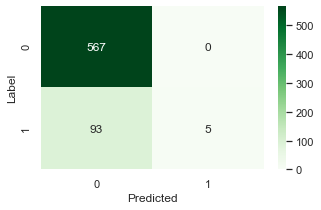

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Label'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.0)#for label size
sns.heatmap(conf_mat, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='g')

plt.show()

### Support Vector Machine

In [55]:
from sklearn.svm import SVC

pipeline = make_pipeline(StandardScaler(),
                         LDA(),
                         SVC(random_state=1, kernel='linear'))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuratezza su test set: %.3f" % accuracy_score(y_test, y_pred))

Accuratezza su test set: 0.853


In [56]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']},
              {'svc__C': param_range,
               'svc__kernel': ['linear']}
             ]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  refit=True,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel': 'rbf'}


In [57]:
best_est = gs.best_estimator_
best_est.fit(X_train, y_train)
print('accuracy score su test set (dopo la GS): %.3f' % best_est.score(X_test, y_test))

accuracy score su test set (dopo la GS): 0.866


In [58]:
from sklearn.metrics import classification_report

y_pred = best_est.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       567
           1       1.00      0.09      0.17        98

    accuracy                           0.87       665
   macro avg       0.93      0.55      0.55       665
weighted avg       0.88      0.87      0.82       665



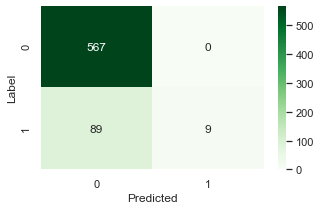

In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Label'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.0)#for label size
sns.heatmap(conf_mat, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='g')
plt.show()

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(StandardScaler(),
                         LDA(),
                         DecisionTreeClassifier(random_state=1))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuratezza su test set: %.3f" % accuracy_score(y_test, y_pred))

Accuratezza su test set: 0.777


In [62]:
from sklearn.model_selection import GridSearchCV

param_range = [1, 2, 3, 4, 5, 6, 7, None]
param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'decisiontreeclassifier__max_depth': 1}


In [63]:
best_est = gs.best_estimator_
best_est.fit(X_train, y_train)

print('Accuratezza su test set (dopo la GS): %.3f' % best_est.score(X_test, y_test))

Accuratezza su test set (dopo la GS): 0.853


In [65]:
from sklearn.metrics import classification_report

y_pred = best_est.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       567
           1       0.00      0.00      0.00        98

    accuracy                           0.85       665
   macro avg       0.43      0.50      0.46       665
weighted avg       0.73      0.85      0.78       665



C:\Users\micky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


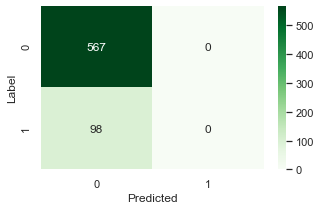

In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Label'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.0)#for label size
sns.heatmap(conf_mat, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='g')
plt.show()

### K-Nearest Neighbor

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(StandardScaler(),
                         LDA(),
                         KNeighborsClassifier())

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuratezza su test set: %.3f" % accuracy_score(y_test, y_pred))

Accuratezza su test set: 0.836


In [68]:
from sklearn.model_selection import GridSearchCV

param_range = range(1, 20)
param_grid = [{
    'kneighborsclassifier__n_neighbors':
    param_range,
    'kneighborsclassifier__metric':
    ['euclidean', 'manhattan', 'chebyshev']
}]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 18}


In [69]:
best_est = gs.best_estimator_
best_est.fit(X_train, y_train)
y_pred = best_est.predict(X_test)
print('Accuracy score su test set (dopo la GS): %.3f' % best_est.score(X_test, y_test))

Accuracy score su test set (dopo la GS): 0.866


In [70]:
from sklearn.metrics import classification_report

y_pred = best_est.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       567
           1       1.00      0.09      0.17        98

    accuracy                           0.87       665
   macro avg       0.93      0.55      0.55       665
weighted avg       0.88      0.87      0.82       665



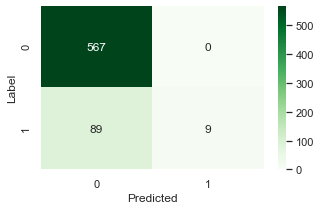

In [71]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Label'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.0)#for label size
sns.heatmap(conf_mat, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='g')
plt.show()

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(),
                         LDA(),
                         RandomForestClassifier(criterion='gini', random_state=1, n_jobs=-1))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuratezza su test set: %.3f" % accuracy_score(y_test, y_pred))

Accuratezza su test set: 0.777


In [74]:
from sklearn.model_selection import GridSearchCV

param_range = [1, 2, 3, 4, 5, 6, 7, None]
param_grid = [{'randomforestclassifier__max_depth': param_range,
               'randomforestclassifier__n_estimators': [5, 10, 15, 20, 25, 30],
               'randomforestclassifier__criterion': ['gini', 'entropy']}]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 5}


In [75]:
best_est = gs.best_estimator_
best_est.fit(X_train, y_train)
y_pred = best_est.predict(X_test)
print('Accuratezza su test set (dopo la GS): %.3f' % best_est.score(X_test, y_test))

Accuratezza su test set (dopo la GS): 0.865


In [76]:
from sklearn.metrics import classification_report

y_pred = best_est.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       567
           1       0.90      0.09      0.17        98

    accuracy                           0.86       665
   macro avg       0.88      0.55      0.55       665
weighted avg       0.87      0.86      0.81       665



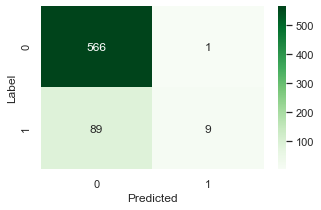

In [77]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Label'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.0)#for label size
sns.heatmap(conf_mat, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='g')
plt.show()